In [206]:
import numpy as np
from numpy.polynomial import polynomial as P

def innerProductPolynoms(f1, f2, xmin, xmax):
        f1mf2 = P.polysub(f1,f2)
        f1mf2 = P.polymul(f1mf2,f1mf2)
        val = P.polyint(f1mf2,lbnd=xmin)
        #print("val", val)
        ip = np.abs(val[0] + val[1]*(xmax-xmin)+val[2]*(xmax-xmin)**2+val[3]*(xmax-xmin)**3+val[4]*(xmax-xmin)**4+val[5]*(xmax-xmin)**5)
        return np.sqrt(ip)/abs(xmax-xmin)
    
def associatePolynomAndPrior(res, priors):
    ass_list = []
    polynoms = res[-1]
    
    for iprior,prior in enumerate(priors):
        for ipol,polynom in enumerate(polynoms):
            f1 = (prior[0],prior[1],prior[2])
            f2 = (polynom["f"].c[2],polynom["f"].c[1],polynom["f"].c[0])
            xmin = max(prior[3],polynom["x_start"])
            xmax = min(prior[4],polynom["x_end"])
            dist = innerProductPolynoms(f1,f2,xmin,xmax)
            if dist < 2 and xmax-xmin > 5:
                ass_list.append((iprior,ipol))
                
    return ass_list

def ComputeCoeffErrors(res, prior, ipolynom):
    #print(res[-1][ipolynom]["f"],prior)
    a0_err = np.zeros([len(res), 3])
    a1_err = np.zeros([len(res), 3])
    a2_err = np.zeros([len(res), 3])
    for iframe,frame in enumerate(res):
        a0_err[iframe,0] = abs(frame[ipolynom]["f"].c[2] - prior[0])
        a1_err[iframe,1] = abs(frame[ipolynom]["f"].c[1] - prior[1])
        a2_err[iframe,2] = abs(frame[ipolynom]["f"].c[0] - prior[2])
        
    a0_mean_err = np.mean(a0_err)
    a1_mean_err = np.mean(a1_err)
    a2_mean_err = np.mean(a2_err)
    print(f"ComputeCoeffErrors: mean err for prior {prior} = ({a0_mean_err},{a1_mean_err},{a2_mean_err})")
    
    
def ComputePolynomDistance(res, prior, ipolynom):
    dist = np.zeros(len(res))
    for iframe,frame in enumerate(res):
        
        f1 = (prior[0],prior[1],prior[2])
        f2 = (frame[ipolynom]["f"].c[2],frame[ipolynom]["f"].c[1],frame[ipolynom]["f"].c[0])
        xmin = max(prior[3],frame[ipolynom]["x_start"])
        xmax = min(prior[4],frame[ipolynom]["x_end"])
        dist[iframe] = innerProductPolynoms(f1,f2,xmin,xmax)
        #print("f1",f1,"f2",f2,"xmin",xmin,"xmax",xmax,"dist[iframe]",dist[iframe])
        
    dist_mean_err = np.mean(dist)
    dist_max_err = np.max(dist)
    print(f"ComputePolynomDistance: dist_mean_err for prior {prior} = {dist_mean_err}")
    print(f"ComputePolynomDistance: dist_max_err for prior {prior} = {dist_max_err}")
    
def ComputeOverlappingArea(res, prior, ipolynom):
    overlap = np.zeros(len(res))
    for iframe,frame in enumerate(res):
        xmin = max(prior[3],frame[ipolynom]["x_start"])
        xmax = min(prior[4],frame[ipolynom]["x_end"])
        
        xminmin = min(prior[3],frame[ipolynom]["x_start"])
        xmaxmax = max(prior[4],frame[ipolynom]["x_end"])
        overlap[iframe] = np.abs(xmax-xmin)/np.abs(xmaxmax-xminmin)
        
    overlap_mean = np.mean(overlap)
    overlap_min = np.min(overlap)
    print(f"ComputeOverlappingArea: overlap_mean for prior {prior} = {overlap_mean}")
    print(f"ComputeOverlappingArea: overlap_min for prior {prior} = {overlap_min}")
    
def ComputeNonOverlappingArea(res, prior, ipolynom):
    nonoverlap = np.zeros(len(res))
    for iframe,frame in enumerate(res):
        dmin = prior[3]-frame[ipolynom]["x_start"]
        dmax = frame[ipolynom]["x_end"] - prior[4]
        
        dmin = dmin if dmin > 0 else 0
        dmax = dmin if dmax > 0 else 0
        
        nonoverlap[iframe] = dmax + dmin
        
    nonoverlap_mean = np.mean(nonoverlap)
    nonoverlap_max = np.max(nonoverlap)
    print(f"ComputeNonOverlappingArea: onon_verlap_mean for prior {prior} = {nonoverlap_mean}")
    print(f"ComputeNonOverlappingArea: non_overlap_max for prior {prior} = {nonoverlap_max}")
        

def analyzeResults(res, priors):
    ass_list = associatePolynomAndPrior(res, priors)
    print("ass_list", ass_list)
    for iprior,prior in enumerate(priors):
        ComputeCoeffErrors(res, priors[ass_list[iprior][0]], ass_list[iprior][1])
        ComputePolynomDistance(res, priors[ass_list[iprior][0]], ass_list[iprior][1])
        ComputeOverlappingArea(res, priors[ass_list[iprior][0]], ass_list[iprior][1])
        ComputeNonOverlappingArea(res, priors[ass_list[iprior][0]], ass_list[iprior][1])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
frame 0
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[ 9.63446968  7.65310058]
 [ 9.85289422  7.52479887]
 [ 9.79800009  7.89297503]
 [ 9.90040843  8.01820812]
 [10.40829252  7.4219693 ]
 [10.18940584  8.5369223 ]
 [10.95829817  8.60553027]
 [10.28209581  8.09582476]
 [10.7256387   8.55839383]
 [11.04121072  8.02302334]
 [10.31008582  8.45213161]
 [10.81806266  8.92947515]
 [10.59559596  8.61055433]
 [10.78797017  8.68518656]
 [10.75899381  8.44740491]
 [11.44523522  8.72816874]
 [11.06319763  9.03502347]
 [11.42692919  9.36664043]
 [10.92406896  9.11545655]
 [11.12211286  9.26139769]
 [11.65219233  9.41780597]
 [11.34529859  9.52624764]
 [11.43799305  9.44787122]
 [11.79132586  9.14777425]
 [11.55933088  9.00754479]
 [10.59970553  8.76848376]
 [10.78366616  9.18737479]
 [10.70780216  9.49929708]
 [11.48883865  9.46460365]
 [11.27040107  9.69453406]
 [11.43899448  9.38446096]
 [11.06667455 10.004005

/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


len(unique_polynoms) 0
frame 2
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[10.32681762  7.183209  ]
 [10.14252163  7.6711842 ]
 [11.46758971  8.6911507 ]
 [10.24514705  8.05111165]
 [10.1384706   8.43725551]
 [10.84130757  8.62645511]
 [10.87058416  8.23513762]
 [11.20105922  8.41931415]
 [10.78795456  8.82091018]
 [10.7220333   8.20638117]
 [11.18686601  9.23975622]
 [11.29015608  8.94457806]
 [10.98350975  8.20183214]
 [11.01411736  8.22553826]
 [10.72796624  8.86091871]
 [11.21890792  8.53028555]
 [11.7156294   8.90610008]
 [10.94820757  8.78346496]
 [11.37999862  9.44343602]
 [10.7106015   9.45794336]
 [11.38852022  9.4359263 ]
 [11.05262342  9.50946164]
 [11.40870578 10.34377443]
 [11.90444173  9.81953482]
 [10.76390963  9.90646369]
 [11.54405788  9.83810211]
 [11.10576411  9.10362878]
 [11.2203836   9.19454743]
 [11.12026988  9.9983581 ]
 [11.20611845 10.48678617]
 [11.27463409  9.8399351 ]
 [12.27971326 10.53822598]
 [11.77588088 10.59294366]
 [11.85012707 10.98766706]
 [12.52

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Extended track is too short curve_length=3.1910105812522573
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-1.8401844839796793, 1.1146325295105424, -0.04815575422138552) (0.0, 0.7092041545557635, -0.023958419266353177)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.245804737894864, 0.7634808883121008, 0.12311109691597437) (0.0, 0.666865920262726, 0.015124128969913461)
len(unique_polynoms) 1
frame 4
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[10.76391467  7.48615208]
 [10.07234367  7.7808394 ]
 [ 9.92595725  7.81363909]
 [ 9.73747288  7.4427851 ]
 [ 9.93470267  7.62084982]
 [10.70876275  8.26548625]
 [10.5343693   7.49863287]
 [10.63606957  7.95289323]
 [10.67518639  8.28194975]
 [11.14213221  8.16100028]
 [10.63563588  8.5430984 ]
 [10.54964384  8.01292295]
 [10.46636697  8.40171034]
 [10.35306671  7.98446168]
 [11.03847443  8.80139945]
 [11.42806947  8.51128311]
 [11.53374101  8.70105725]
 [11.00200019  8.956

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-1.327424540266064, 1.028547415204955, -0.04815575422138551) (0.0, 0.7576800812975213, -0.03150813583035941)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.050334275724426385, 0.45189882081205324, 0.1231110969159748) (0.0, 0.5850059942977595, 0.021562684347634774)
len(unique_polynoms) 0
frame 5
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[10.57761095  7.95625317]
 [ 9.72097213  7.58438078]
 [ 9.90376241  8.10901475]
 [10.08102171  7.07533458]
 [10.56418959  7.6609034 ]
 [10.52866023  7.81323638]
 [ 9.99035248  8.01479881]
 [10.63333146  8.10727535]
 [10.99877001  8.32576838]
 [10.77407198  7.83574806]
 [10.85555683  8.45021437]
 [10.78166648  7.57804407]
 [10.1012407   7.65612137]
 [10.64366767  7.84069682]
 [11.15198894  8.49601541]
 [11.51142803  8.28609271]
 [11.09177652  8.75780483]
 [10.46479761  8.67949934]
 [11.66621941  8.90481059]
 [10.95866083  8.68431631]
 [11.19827655  9.06438531

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (2.4212310351710338, 0.947240356476605, 0.1234733392980831) (0.0, 0.8984899540083675, -0.02853313415893721)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.3420108209901749, 0.25622247906866613, 0.12347333929808316) (0.0, 0.2734417084924941, 0.14054524315808817)
len(unique_polynoms) 2
frame 6
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[10.09268668  7.47932401]
 [10.84008995  8.2261175 ]
 [ 9.80478524  7.99487472]
 [10.30583064  7.62472356]
 [10.0441267   8.09389783]
 [10.80720527  8.05873053]
 [10.17099677  8.22646045]
 [11.31586796  8.25879213]
 [10.06567722  8.08703077]
 [10.94304329  8.14290664]
 [10.32595856  7.89176747]
 [11.21098943  8.83463905]
 [11.12766774  9.39191878]
 [11.46957436  8.88289512]
 [10.86517944  8.81545079]
 [10.78374834  9.49789982]
 [11.09369163  8.69837447]
 [10.52400542  8.27973964]
 [11.08485342  8.65778021]
 [11.0522489   9.20508289]
 [11.85205365  9.26649274]
 [

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.08358077434108262, 0.3559863278806489, 0.12347333929808317) (0.0, 0.6383806135019412, -0.014383551675880395)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.7093688478481096, 0.7014139519746164, -0.04006544117759378) (0.0, 0.660716875662885, -0.037928656008931645)
len(unique_polynoms) 1
frame 7
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[ 9.76255114  7.73767483]
 [ 9.87212935  7.70532665]
 [10.15440691  7.9300495 ]
 [11.21011471  7.37193754]
 [10.2397997   7.57744077]
 [10.12898074  7.46070023]
 [10.50169875  8.06324381]
 [10.5394507   8.06170609]
 [10.5995852   8.23057458]
 [11.34067527  8.49398542]
 [10.62536151  8.98719383]
 [10.34212232  8.31389891]
 [10.43900448  8.03685268]
 [11.45963484  8.50701785]
 [10.32319392  8.0060912 ]
 [10.63223735  8.18914312]
 [10.76821473  8.59311639]
 [10.504169    8.60641321]
 [11.43719878  8.38712378]
 [10.43904855  8.41994787]
 [10.502388    8.314735

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.06458615422711111, 0.32946759408285997, 0.12347333929808307) (0.0, 0.3747554798809275, 0.049022369498597076)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.8926438744162974, 0.7285845602234189, -0.040065441177593884) (0.0, 0.5044801058765983, -0.018679081218275575)
len(unique_polynoms) 0
frame 8
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[10.47554998  8.03518041]
 [ 9.58528446  7.38432337]
 [10.03590343  7.82397457]
 [10.22541511  7.25161939]
 [10.21705162  8.04903905]
 [10.97533127  7.91420666]
 [10.24580223  7.83913843]
 [10.09313667  8.13754182]
 [ 9.74445839  7.31639429]
 [10.75994978  8.16111008]
 [10.72481963  7.90051413]
 [10.67113509  7.99282549]
 [10.32220642  8.16350105]
 [10.4963244   7.76750504]
 [10.29404137  8.61447385]
 [10.7769994   8.35917162]
 [11.1648227   8.11395743]
 [10.38242951  8.13358332]
 [10.64656237  8.12021855]
 [10.94852657  8.69542071]
 [11.38761281  8.8429

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (2.9916707936980225, 1.486741361730474, 0.14883598337099613) (0.0, 0.7488556005343228, -0.02798207356496208)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-1.7527414205580627, -1.2901359477226175, -0.02892420090975222) (0.0, -0.38418975482452594, 0.08380754313012433)
len(unique_polynoms) 1
frame 9
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[10.48922583  8.18635862]
 [10.00761609  7.44824496]
 [10.06547881  7.19139149]
 [10.21379098  7.62416301]
 [10.08548028  7.66521245]
 [10.18453338  7.97877478]
 [10.02230912  7.94056126]
 [10.32849738  8.08242933]
 [10.5922272   8.60213201]
 [10.83998237  8.32758545]
 [10.7961883   9.0751447 ]
 [10.4163936   8.20374039]
 [11.01090448  8.49162485]
 [11.22246323  8.63659896]
 [10.81631257  8.91631837]
 [10.13019629  8.31290334]
 [10.78278119  8.58856862]
 [11.18249885  8.71291455]
 [11.74143107  9.29505846]
 [11.68756292  

/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le
/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (2.100463394488813, 1.3492484485551068, 0.14883598337099624) (0.0, 0.7617816472591754, -0.03216526780483332)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.4201941937237191, 0.08856427809804468, 0.14883598337099618) (0.0, 0.5619327154209717, 0.02844842287097673)
len(unique_polynoms) 0
frame 10
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[10.58478835  7.75509724]
 [10.27916653  7.60500112]
 [ 9.71615295  7.7620802 ]
 [10.49127754  7.83915753]
 [10.15283345  7.46675474]
 [ 9.5822519   8.07375027]
 [10.69971128  8.07914805]
 [10.99612824  8.61377327]
 [10.47306849  8.8839303 ]
 [10.56686921  8.345706  ]
 [10.73171748  8.26989263]
 [10.54005253  8.85566623]
 [11.25792813  8.78997316]
 [10.80138848  8.09201938]
 [11.13153701  9.11802122]
 [11.45222886  9.18497051]
 [11.43923486  8.89562697]
 [11.47018028  8.90011724]
 [11.06477199  8.43343185]
 [11.60408118  9.66976189]
 [11.88330029  9.37381967]


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.4088714356368007, 0.1705321973149505, 0.14883598337099604) (0.0, 0.7947138432092367, -0.02659118622040821)
Opening flipped polynom!!!
created an extended object! [-9.91403585  2.27036498 -0.05033682 14.55147515 24.9188986 ]
len(unique_polynoms) 0
frame 11
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[ 9.72611225  8.00943986]
 [10.06237482  7.92149291]
 [ 9.72672837  7.78291291]
 [ 9.78525761  7.72390177]
 [10.60862389  7.72733967]
 [10.13046188  7.90236679]
 [10.54636469  8.07674539]
 [10.47418566  7.92781249]
 [10.36536639  8.05091665]
 [10.21283858  7.96422827]
 [10.367978    7.71269763]
 [10.66073549  8.03209998]
 [11.56293028  8.61064258]
 [10.77372881  8.25607512]
 [10.62578335  7.83408972]
 [10.43860662  8.32347489]
 [10.98196395  8.93815174]
 [10.71545697  9.02566922]
 [11.08802797  8.66932014]
 [10.95102981  9.01668653]
 [11.58522914  9.36145389]
 [11.50710552  9.61797318]
 [11.21075153  9.21268075]
 [11.38

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (1.4971150158750754, 1.1918946794850098, 0.1488359833709962) (0.0, 0.6232988930390212, -0.01979165432002189)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.5418973293959655, -1.1003834197722426, -0.028261364234282823) (0.0, -0.4424726120313949, 0.2842592131741069)
len(unique_polynoms) 0
frame 12
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[ 9.73819651  7.46755609]
 [10.09575264  7.75013458]
 [10.65492657  8.02216449]
 [10.00802845  7.29650082]
 [10.48076499  7.90036993]
 [10.19977576  7.7209433 ]
 [10.68549338  7.93419667]
 [10.90943362  8.35267975]
 [10.86432656  8.28966969]
 [10.62055141  7.68784871]
 [10.08178224  7.89033303]
 [11.24718056  8.49515949]
 [11.18208564  8.4244893 ]
 [10.74774387  9.55342565]
 [ 9.99922512  8.33333915]
 [10.82489381  9.08571589]
 [10.84412336  8.28988998]
 [10.37541625  9.12020055]
 [11.29608547  9.86247121]
 [11.51815322 10.02238963]
 [11.41696699  9.6095920

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  1
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.6926427710426253, 0.11985238033710299, 0.14883598337099616) (0.0, 0.7763669721545814, -0.021511559999108965)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.023697182006134562, 0.5588357339062078, -0.04007805399667925) (0.0, 0.597245977461687, -0.03714100936697881)
len(unique_polynoms) 1
frame 13
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[ 9.7884233   7.54882134]
 [10.21255059  8.01436109]
 [10.20495969  7.91042496]
 [10.23637644  7.74971894]
 [ 9.69556375  7.19284752]
 [ 9.85314879  7.78453099]
 [10.54499818  8.56943067]
 [10.76397421  7.84554665]
 [ 9.53496207  7.97049664]
 [10.35311684  8.06197807]
 [10.30147368  8.41578559]
 [10.72294953  8.11164985]
 [10.43078709  7.65195541]
 [ 9.90644841  7.56849793]
 [10.81672308  8.03734282]
 [10.88882859  8.7298431 ]
 [10.27191415  8.19450341]
 [10.9050593   8.72943427]
 [10.46937603  8.36017557]
 [10.9857104

/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le
/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (2.552251577458887, 1.5302149122919597, 0.14883598337099624) (0.0, 0.582059187142351, -0.01953042176541455)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.7768113375981125, -1.1227075604955254, -0.0278765285964078) (0.0, -0.26917073545789344, 0.2422179401177225)
len(unique_polynoms) 0
frame 14
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[10.20436805  7.51730555]
 [10.37190094  7.52183585]
 [10.27888421  7.60512925]
 [10.23189289  7.49459803]
 [ 9.72275514  7.60296583]
 [10.11357014  7.74665806]
 [10.34639991  7.64570637]
 [10.65899733  7.23486868]
 [10.31470332  7.25937383]
 [10.24081528  7.50129214]
 [11.14948072  8.12582742]
 [10.07271443  7.62647784]
 [10.50587142  8.08297593]
 [10.32671148  8.11535139]
 [10.66854491  8.77616858]
 [10.08505995  8.12843036]
 [11.01456464  8.96470042]
 [11.18870591  8.31932012]
 [10.71146327  8.24137031]
 [10.44152236  8.43049081]
 [10.6673879   8.05458402]

/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le
/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.8353899308253465, -0.05311394889862742, 0.14883598337099602) (0.0, 0.7934012606580667, -0.02265057050034401)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.1956568703787036, 0.6586306957495498, -0.040078053996679644) (0.0, 0.6709702955048121, -0.038623868445023)
len(unique_polynoms) 0
frame 15
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[10.268575    7.64668011]
 [10.08089694  7.37465343]
 [ 9.63431175  7.22656923]
 [ 9.91203904  8.01580775]
 [10.2994756   7.61223147]
 [10.04662704  7.61783909]
 [ 9.76340728  7.35315328]
 [10.16075268  7.69355062]
 [10.06820183  8.1495876 ]
 [10.7852319   8.43770603]
 [10.7660595   8.44134201]
 [11.22599775  8.72714846]
 [10.87149347  8.00834958]
 [10.59524457  8.1531222 ]
 [11.03699294  8.36496447]
 [11.44402334  8.72105537]
 [11.15435952  8.97922   ]
 [11.61095895  9.41240329]
 [10.6146949   8.85303078]
 [11.23539213  9.71150239]
 [10.75283812  8.909360

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (1.6077819890378107, 1.29158772530289, 0.14883598337099613) (0.0, 0.7256423980784144, -0.027961214260615302)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.4766808859638669, 0.09903570566303355, 0.14883598337099616) (0.0, 0.8220466104434285, -0.035085024377407154)
len(unique_polynoms) 0
frame 16
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[10.1057814   6.99241064]
 [10.03864391  7.24110087]
 [ 9.9150695   7.89455609]
 [ 9.72685884  7.59275523]
 [10.66414392  8.14184374]
 [10.62071931  7.96025873]
 [10.27519818  7.81435099]
 [10.43238211  7.74560231]
 [10.34218308  8.22214649]
 [10.4302596   7.82429796]
 [ 9.79285242  7.6742812 ]
 [10.29753797  7.70253285]
 [10.88503801  8.35688027]
 [10.55410434  8.56770339]
 [11.09390756  8.36502028]
 [10.50561647  8.51481691]
 [10.92731943  8.80902881]
 [10.22470748  8.28094095]
 [11.72027958  8.88976939]
 [11.20491824  8.37196557]
 [10.36788966  8.51519402

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.6607913497664375, 0.029333256097269444, 0.14883598337099632) (0.0, 0.8283887930340237, -0.034137020308084264)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.5056599083603408, 0.7070501004585916, -0.040078053996679415) (0.0, 0.6925510786249203, -0.0407857086681529)
len(unique_polynoms) 0
frame 17
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[10.1123818   7.31224024]
 [ 9.9789662   7.91891895]
 [10.40761058  7.8628678 ]
 [10.39165631  7.66536685]
 [11.14207723  7.80907393]
 [10.09666008  8.44576189]
 [11.05786202  9.12666981]
 [11.39097157  8.93714514]
 [10.58643391  8.60731368]
 [10.87504886  8.76604891]
 [10.62904218  8.82410175]
 [11.30390472  8.77402414]
 [11.13036033  9.05715632]
 [11.31273889  9.14996395]
 [11.21459289  8.94797155]
 [10.74039422  9.19740421]
 [11.19635393  9.15546734]
 [10.88851955  9.56026371]
 [11.07038634  8.99495465]
 [12.01481281 10.0455922 ]
 [11.48450816 10.5163

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (3.248649222309762, 1.589376608932252, 0.14883598337099618) (0.0, 0.9003784133076029, -0.04130758165496915)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.4209453138051849, 0.12453756336443789, 0.1488359833709961) (0.0, 0.5007846725833471, 0.03710852587532995)
len(unique_polynoms) 0
frame 18
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[10.3401692   7.96577312]
 [10.25874631  8.07251178]
 [10.06422789  7.29324592]
 [10.33135026  8.34968403]
 [10.47276917  7.36026332]
 [10.43862833  7.93246973]
 [10.63514419  7.91461044]
 [10.46173805  8.59458904]
 [10.17862491  8.15992624]
 [10.67595494  8.29127122]
 [10.85461813  9.00721183]
 [10.25110728  8.22467509]
 [10.64323424  8.71568306]
 [10.06927525  8.37551326]
 [10.70075224  8.76628347]
 [10.83104141  8.88435095]
 [10.89757854  8.65665504]
 [11.31140529  8.62969962]
 [10.58956334  8.8899346 ]
 [10.72677598  8.97331906]
 [11.25049042  8.7095161 ]
 [

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.6594098620193569, 0.1188834857678327, 0.14883598337099624) (0.0, 0.8224939021962483, -0.033921249613649465)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.5328210011397951, 0.6474785115310288, -0.040078053996679595) (0.0, 0.5688810116618727, -0.03392639474872463)
len(unique_polynoms) 0
frame 19
[prior[3],prior[4]] [10, 16.1] [0.0, 0.0]
z [[ 9.95372384  7.72957983]
 [10.17443277  6.72968932]
 [10.36829286  8.03168817]
 [ 9.83054478  7.81430404]
 [10.51584915  7.96469131]
 [ 9.97080192  7.6411491 ]
 [10.30448344  7.89593118]
 [10.23802629  7.53362865]
 [10.3446612   7.89172637]
 [10.47328074  8.19329703]
 [10.3478321   8.18359653]
 [10.73142737  8.3515394 ]
 [10.80714289  8.37995584]
 [11.51055865  8.58583968]
 [10.65700401  8.47223819]
 [11.14821982  8.73189353]
 [10.94509893  8.72210478]
 [10.89083555  8.87076773]
 [10.71871757  8.69609173]
 [11.11741481  8.7940072 ]
 [10.68692177  9.00650

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (0.1520004211177387, 0.6288724627176105, 0.14883598337099635) (0.0, 1.1649756548558985, -0.017127867489488285)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (1.2152181282861738, 1.113266099774394, 0.14883598337099635) (0.0, 0.5908965724098396, -0.01643880272803167)
Opening flipped polynom!!!
Extended track is too short curve_length=4.763837311160711
len(unique_polynoms) 0
ass_list [(0, 0), (0, 1)]
ComputeCoeffErrors: mean err for prior (-8.13, 2.57, -0.06, 7.5, 25, False) = (7.324007020630952,1.3306453020998301,0.060569121353020804)
ComputePolynomDistance: dist_mean_err for prior (-8.13, 2.57, -0.06, 7.5, 25, False) = 0.7077216101702725
ComputePolynomDistance: dist_max_err for prior (-8.13, 2.57, -0.06, 7.5, 25, False) = 4.29526660372177
ComputeOverlappingArea: overlap_mean for prior (-8.13, 2.57, -0.06, 7.5, 25, False) = 0.4482282946764381
ComputeOverlappingArea: overlap_min for prior (-8.13, 2

/home/kfir/workspace/RadarLocalization/tracker.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


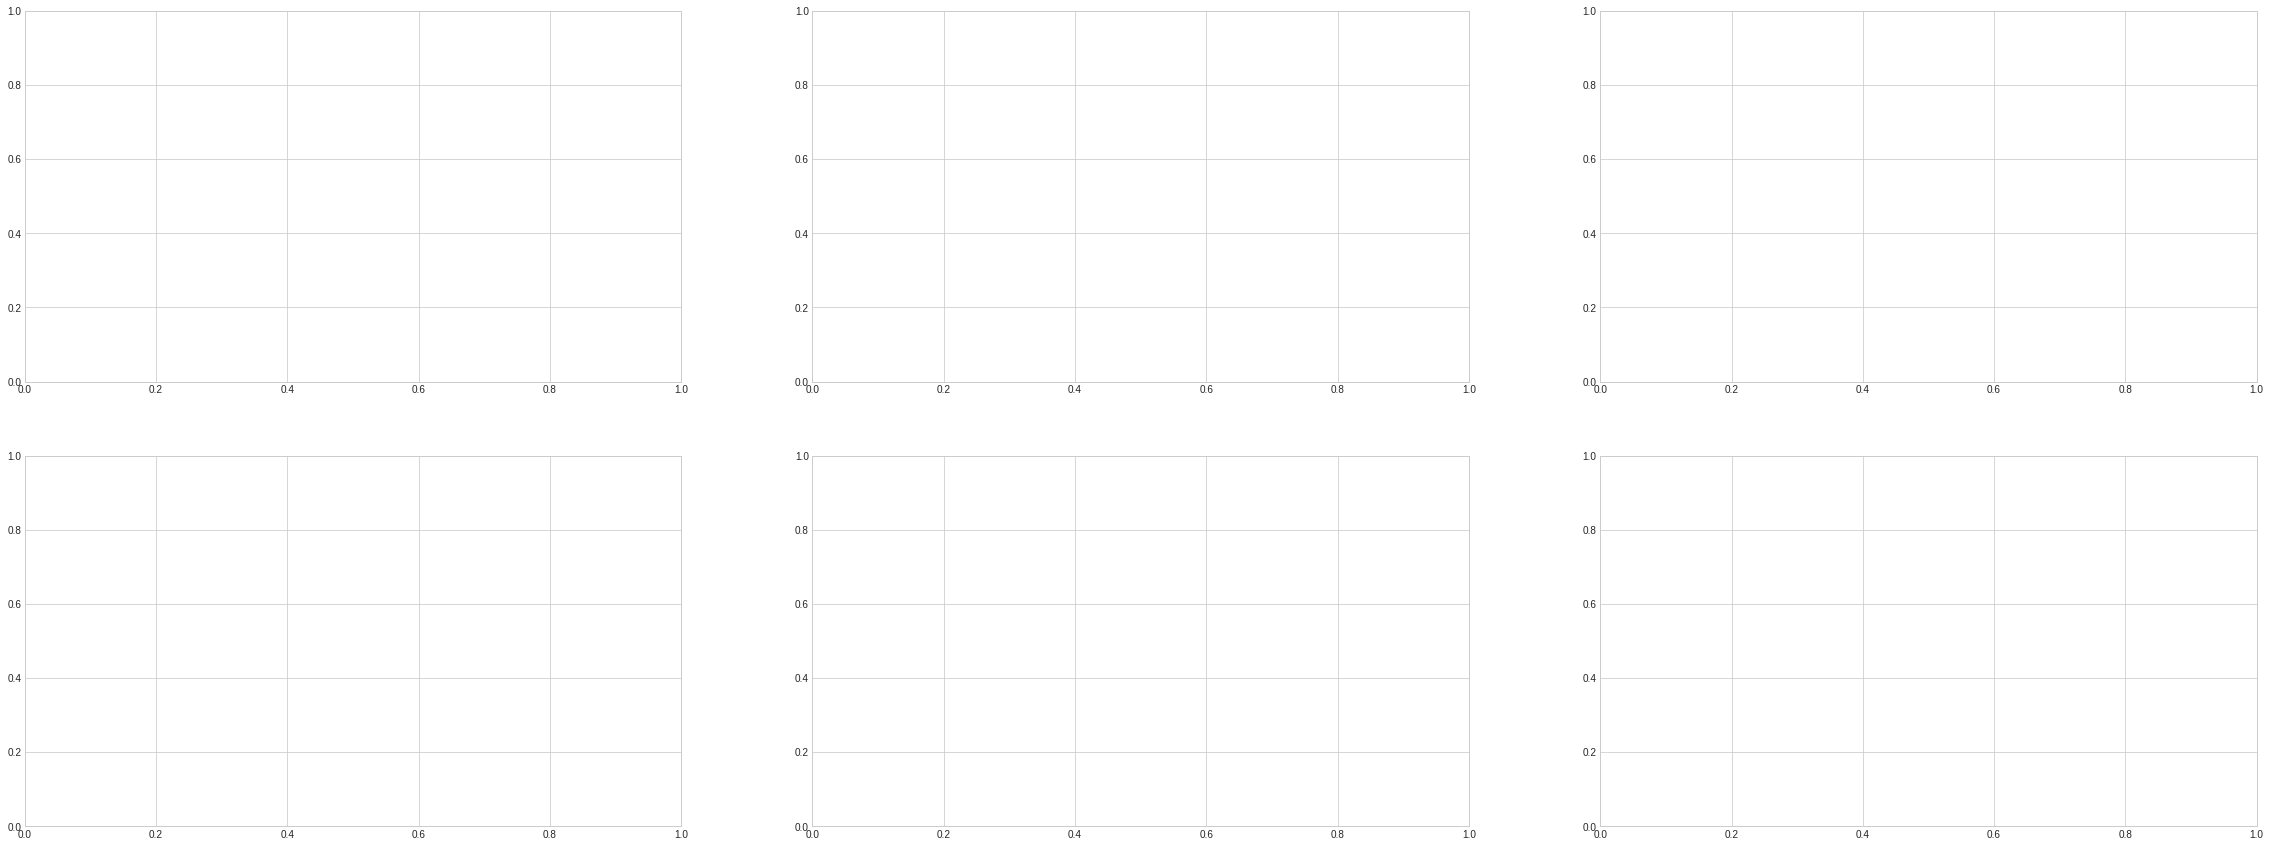

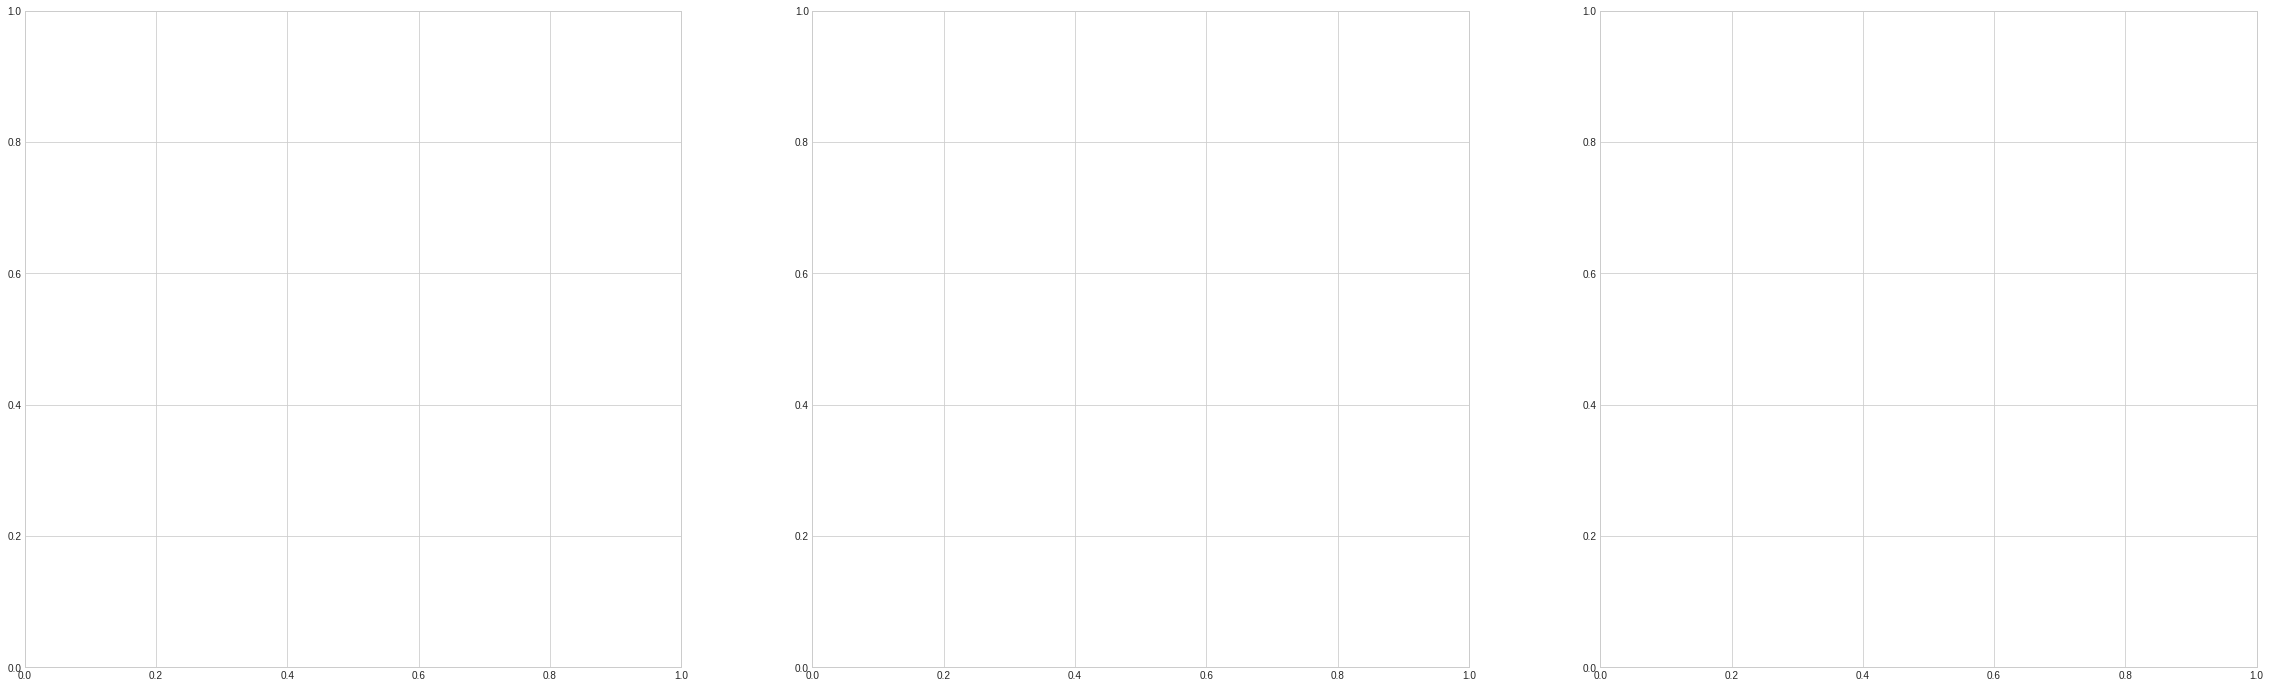

In [359]:
%load_ext autoreload
%autoreload 2
from simulation import DynamicSimulation
from tracker import StaticTracker
model = StaticTracker()
#prior = [(0, 0, 0.00001, 3, 40, True), 
        #(10, 0.009, -0.004, 50, 90, True),
        #(40, 0, -0.01, 1, 40, False)]
#prior = [(0, 0, 0.0001, 3, 40)]
prior = [(-8.13,2.57,-0.06,7.5,25,False)]
#prior = [(27.5,-5,0.3,10,16.1,True)]
#prior = [(25,0,0.13,-20,20,False)]
#prior = [(60,0,-0.2,-15,15,False)]
sim = DynamicSimulation(model,prior=prior)
res = sim.run(N=20)

analyzeResults(res[2:],prior)

In [178]:
prior = [(27.5,-5,0.3,10,16.1,True)]
print(res[21:])
analyzeResults(res[21:],prior)

[[{'f': poly1d([  1.09718071, -10.83597746,  34.01642969]), 'x_start': 5.776204946051699, 'x_end': 7.634726083428461, 'fxFlag': False}], [{'f': poly1d([ 0.49354412, -3.46557648,  9.64561674]), 'x_start': 5.794790157425467, 'x_end': 7.616140872054694, 'fxFlag': False}], [{'f': poly1d([  1.04367673, -11.43984101,  38.41297554]), 'x_start': 5.8130036645717595, 'x_end': 7.597927364908402, 'fxFlag': False}], [{'f': poly1d([  1.51122598, -17.86823976,  60.44238428]), 'x_start': 5.264530591429584, 'x_end': 7.551264193909731, 'fxFlag': False}], [{'f': poly1d([  1.51140247, -17.86632244,  60.41928565]), 'x_start': 5.287397927454386, 'x_end': 7.528396857884929, 'fxFlag': False}], [{'f': poly1d([  1.49854861, -17.70098462,  59.89857764]), 'x_start': 5.309807916758691, 'x_end': 7.5059868685806235, 'fxFlag': False}], [{'f': poly1d([  1.49279294, -17.64442596,  59.77084951]), 'x_start': 5.331769706276911, 'x_end': 7.4840250790624046, 'fxFlag': False}], [{'f': poly1d([  1.49852387, -17.71155334,  59.

In [76]:
np.flip(np.array([[2, 3],[4,5]]))

[autoreload of dataset failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/kfir/workspace/RadarLocalization/dataset.py", line 97
    prior_list.append({"c":

array([[5, 4],
       [3, 2]])

In [77]:
np.flip(np.array([[2, 3],[4,5]]))

array([[5, 4],
       [3, 2]])

In [20]:
import scipy.optimize

In [50]:
import numpy as np
import time

px,py = 10,23
a0, a1, a2 = 5, 0.1, 0.01
t1 = time.time()
for i in range(400):
    res = scipy.optimize.minimize(lambda x : np.sqrt((px-x)**2+(py-(a0+i/10.)+a1*x+a2*x**2)**2), x0=[5])
t2 = time.time()
print(t2-t1)
print("res",res.x)
print(res.x, a0 + a1*res.x + a2*res.x**2)
optx = res.x
opty = a0 + a1*res.x + a2*res.x**2

0.43612146377563477
res [17.71929741]
[17.71929741] [9.91166475]


In [55]:
import math
t3 = time.time()
x = np.linspace(-100,100, 100)
y = a0 + a1*x+a2*x**2
for i in range(400):
    a = np.argmin(np.sqrt((x-px)**2+(y-py)**2))
t4 = time.time()
print(t4-t3)
print(x[a], y[a])
print(math.sqrt((x[a]-px)**2+(y[a]-py)**2))
print(math.sqrt((optx-px)**2+(opty-py)**2))

0.008011102676391602
15.151515151515156 8.810835629017449
15.095379886013166
15.195133173954204


In [81]:
import numpy.polynomial.polynomial as P

In [97]:
f1 = (1, 1, 2)
f2 = (1.1, 1, 2.2)
f1mf2 = P.polysub(f1,f2)
f1mf2 = P.polymul(f1mf2,f1mf2)
val = P.polyint(f1mf2,lbnd=-10)
a = P.polyval(-10, val) + P.polyval(5,10)
print(a)

10.0


In [68]:
print (res)

[[{'f': poly1d([-1.02236445e-02,  5.34088473e-03,  3.98952978e+01]), 'x_start': -0.5529887922981365, 'x_end': 39.97303174577813, 'fxFlag': False}, {'f': poly1d([-0.00042631,  0.01510269, -0.11574659]), 'x_start': 4.833046593282244, 'x_end': 38.7783703938952, 'fxFlag': True}, {'f': poly1d([-4.46306256e-03,  6.61758397e-02,  8.85350905e+00]), 'x_start': 50.314965236442816, 'x_end': 77.68272844134319, 'fxFlag': True}], [{'f': poly1d([-1.03754735e-02,  1.29286493e-02,  3.98142964e+01]), 'x_start': -0.3503586896077549, 'x_end': 39.77040164308775, 'fxFlag': False}, {'f': poly1d([-0.0002941 ,  0.01255984, -0.13503909]), 'x_start': 4.162537176968926, 'x_end': 38.60097408217034, 'fxFlag': True}, {'f': poly1d([-1.94101401e-03, -2.51104960e-01,  1.84207231e+01]), 'x_start': 50.526461484425944, 'x_end': 85.7248176360228, 'fxFlag': True}], [{'f': poly1d([-1.03754735e-02,  1.29286493e-02,  3.98142964e+01]), 'x_start': -0.1497548879442772, 'x_end': 39.569797841424275, 'fxFlag': False}, {'f': poly1d([

In [28]:
res[1][0]["f"].c[0]

-0.010265869210950747

f      2
0.3 x - 5 x + 27.5


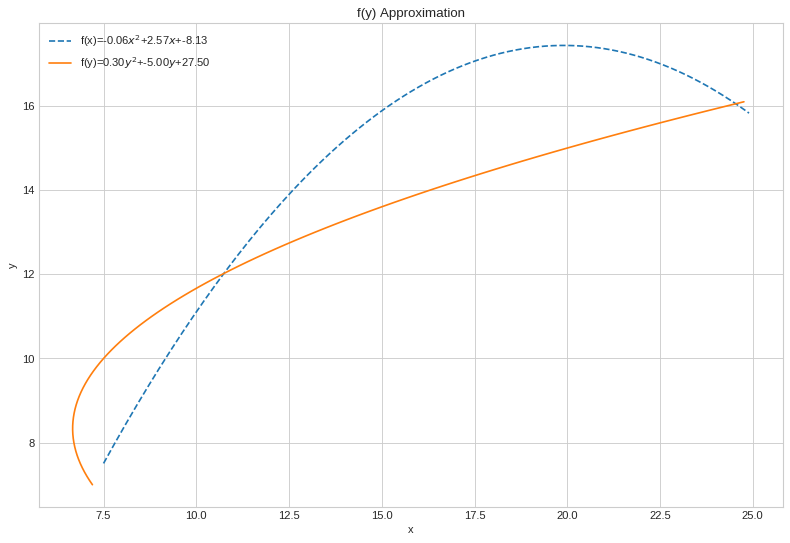

In [156]:
import numpy as np
import matplotlib.pyplot as plt

#real function: f(y) = 0.1y**2+y+1
plt.figure(figsize=(12, 8), dpi=80)
#plt.title(r"f(y)=$y^2$+$y$+1 approximation")
plt.title(r"f(y) Approximation")
plt.xlabel('x')
plt.ylabel('y')
y = np.array([7,12,16,16.1])
x = np.array([7.2,10.7,24.3,24.763])
fitx, covx = np.polyfit(x, y, 2, cov=True)
f = np.poly1d(fitx)
xx = np.arange(7.5,25,0.1)
plt.plot(xx,f(xx),'--',label=f'f(x)={f[2]:.2f}$x^2$+{f[1]:.2f}$x$+{f[0]:.2f}')

fity, covy = np.polyfit(y, x, 2, cov=True)
f = np.poly1d(fity)
print("f",f)
yy = np.arange(7,16.1,0.1)
plt.plot(f(yy),yy,label=f'f(y)={f[2]:.2f}$y^2$+{f[1]:.2f}$y$+{f[0]:.2f}')
plt.legend()


In [151]:
y=np.array([7,12,16,16.1])
x = 0.3*y**2-5*y+27.5
print("x",x)
print(f(x))

x [ 7.2   10.7   24.3   24.763]
[ 7.052      8.347     83.147     87.6468507]


f             2
-5.365e-17 x + 1e-06 x + 1
f             2
-2.497e-17 x + 0.0001 x + 0.9999


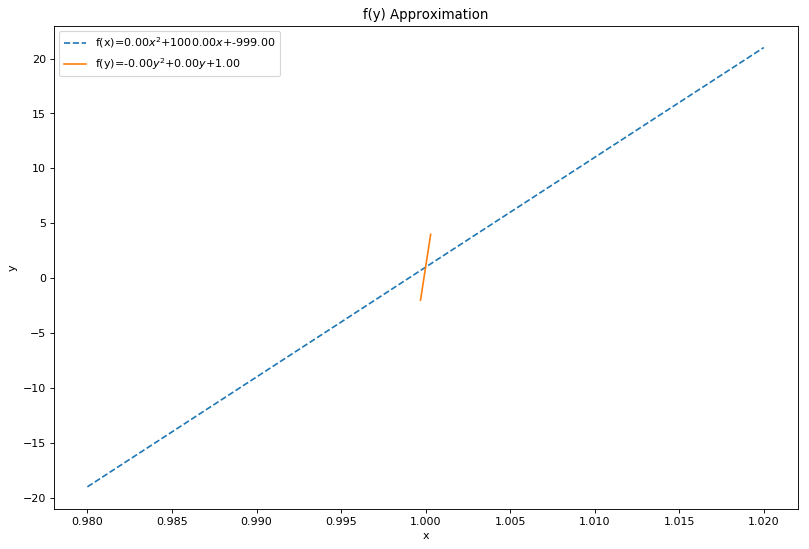

In [96]:
import numpy as np
import matplotlib.pyplot as plt

#real function: f(y) = 0.1y**2+y+1
plt.figure(figsize=(12, 8), dpi=80)
#plt.title(r"f(y)=$y^2$+$y$+1 approximation")
plt.title(r"f(y) Approximation")
plt.xlabel('x')
plt.ylabel('y')
y = np.array([-2,0,2,4])
x = np.array([1,0.999,1.001,1])
fitx, covx = np.polyfit(x, y, 2, cov=True)
print("f",f)
f = np.poly1d(fitx)
xx = np.arange(0.98,1.02,0.001)
plt.plot(xx,f(xx),'--',label=f'f(x)={f[2]:.2f}$x^2$+{f[1]:.2f}$x$+{f[0]:.2f}')

fity, covy = np.polyfit(y, x, 2, cov=True)
f = np.poly1d(fity)
print("f",f)
yy = np.arange(-2,4,0.01)
plt.plot(f(yy),yy,label=f'f(y)={f[2]:.2f}$y^2$+{f[1]:.2f}$y$+{f[0]:.2f}')
plt.legend()

In [204]:
from scipy.spatial.distance import cdist
a0, a1, a2  = 1, 1, 1
M = np.array([[1,2],[3,4],[5,10]])
x = np.linspace(0,10,10*10)
y = a0 + a1*x + a2*x**2
pol = np.array([x,y]).T
print(M.shape, pol.shape)
dists = cdist(M, pol)
print(dists.shape)
ind = np.argmin(dists,axis=1)
D = pol[ind,:]
print(D.shape)
print(D,M)

(3, 2) (100, 2)
(3, 100)
(3, 2)
[[ 0.70707071  2.20701969]
 [ 1.41414141  4.41393735]
 [ 2.62626263 10.52351801]] [[ 1  2]
 [ 3  4]
 [ 5 10]]


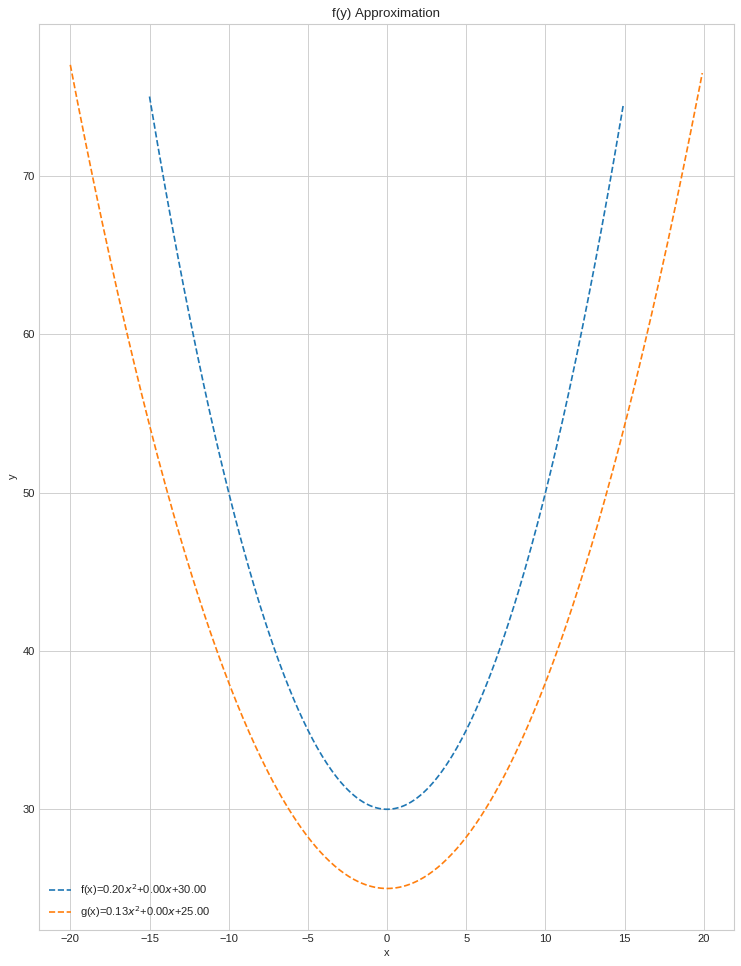

In [328]:
import numpy as np
import matplotlib.pyplot as plt

#real function: f(y) = 0.1y**2+y+1
plt.figure(figsize=(20, 15), dpi=80)
#plt.title(r"f(y)=$y^2$+$y$+1 approximation")

plt.title(r"f(y) Approximation")

plt.xlabel('x')
plt.ylabel('y')
f = [30,0,0.2]
f2 = [25,0,0.13]
xx = np.arange(-15,15,0.1)
yy = f[0] + f[1]*xx + f[2]*xx**2
plt.plot(xx,yy,'--',label=f'f(x)={f[2]:.2f}$x^2$+{f[1]:.2f}$x$+{f[0]:.2f}')

xx = np.arange(-20,20,0.1)
yy = f2[0] + f2[1]*xx + f2[2]*xx**2
plt.plot(xx,yy,'--',label=f'g(x)={f2[2]:.2f}$x^2$+{f2[1]:.2f}$x$+{f2[0]:.2f}')

plt.axis('scaled')

plt.legend()
